In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cardiovascular Disease /CVD.csv")

# Preprocessing

In [4]:
# Check the null vlaues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1501 non-null   object
 1   HTN          1501 non-null   int64 
 2   DM           1501 non-null   int64 
 3   SMK          1501 non-null   int64 
 4   DL           1501 non-null   int64 
 5   FH           1501 non-null   int64 
 6   AMI          1501 non-null   int64 
 7   Sex          1501 non-null   int64 
 8   NSTEMI       1501 non-null   int64 
 9   SA           1501 non-null   int64 
 10  UA           1501 non-null   int64 
 11  HOCABG       1501 non-null   int64 
 12  HOPCI        1501 non-null   int64 
 13  Age_Group    1501 non-null   int64 
 14  LDL1         1501 non-null   object
 15  HDL1         1501 non-null   object
 16  TG1          1501 non-null   object
 17  EF1          1501 non-null   object
 18  Indication1  1501 non-null   int64 
 19  TC1          1501 non-null 

In [5]:
#Check the duplicates
df.duplicated().sum()
#Drop duplicates
df.drop_duplicates(inplace=True)

In [6]:
df.columns

Index(['Name', 'HTN', 'DM', 'SMK', 'DL', 'FH', 'AMI', 'Sex', 'NSTEMI', 'SA',
       'UA', 'HOCABG', 'HOPCI', 'Age_Group', 'LDL1', 'HDL1', 'TG1', 'EF1',
       'Indication1', 'TC1'],
      dtype='object')

In [7]:
df.drop('Name',axis=1,inplace=True)

In [8]:
df.LDL1.value_counts()

,count
LDL1,
1,788
2,640
,67


In [9]:
df.HDL1.value_counts()

,count
HDL1,
2,1117
1,311
,67


In [10]:
df.TG1.value_counts()

,count
TG1,
2,757
1,671
,67


In [11]:
df.EF1.value_counts()

,count
EF1,
1,912
2,487
,96


In [12]:
df.TC1.value_counts()

,count
TC1,
1,1095
2,198
3,135
,67


In [13]:
df[['LDL1', 'HDL1', 'TG1', 'EF1', 'TC1']] = df[['LDL1', 'HDL1', 'TG1', 'EF1', 'TC1']].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

In [14]:
df_cleaned = df[(df['LDL1'] != 0) & (df['HDL1'] != 0) & (df['TG1'] != 0) & (df['EF1'] != 0) & (df['TC1'] != 0)]

In [15]:
df=df_cleaned
df_cleaned.info()
#df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1393 non-null   int64
 1   DM           1393 non-null   int64
 2   SMK          1393 non-null   int64
 3   DL           1393 non-null   int64
 4   FH           1393 non-null   int64
 5   AMI          1393 non-null   int64
 6   Sex          1393 non-null   int64
 7   NSTEMI       1393 non-null   int64
 8   SA           1393 non-null   int64
 9   UA           1393 non-null   int64
 10  HOCABG       1393 non-null   int64
 11  HOPCI        1393 non-null   int64
 12  Age_Group    1393 non-null   int64
 13  LDL1         1393 non-null   int64
 14  HDL1         1393 non-null   int64
 15  TG1          1393 non-null   int64
 16  EF1          1393 non-null   int64
 17  Indication1  1393 non-null   int64
 18  TC1          1393 non-null   int64
dtypes: int64(19)
memory usage: 217.7 KB


In [16]:
df["Indication1"]=df["Indication1"] .replace({1 : 0 , 2 : 1, 3 : 2, 4 : 3, 5: 4})
df['Indication1'].value_counts()

,count
Indication1,
0,486
1,295
4,214
2,205
3,193


In [17]:
df["Age_Group"]=df["Age_Group"] .replace({1 : 0 , 2 : 1, 3 : 2})
df['Age_Group'].value_counts()

,count
Age_Group,
1,826
0,486
2,81


In [18]:
df["Sex"]=df["Sex"] .replace({1 : 0 , 2 : 1})
df['Sex'].value_counts()

,count
Sex,
1,1238
0,155


In [19]:
# v) SHow the imbalanced Dataset using Graph
df['AMI'].value_counts()

,count
AMI,
0,845
1,548


In [20]:
df['Sex'].value_counts()  #0-female 1-Male

,count
Sex,
1,1238
0,155


In [21]:
df["LDL1"]=df["LDL1"] .replace({1 : 0 , 2 : 1})
df['LDL1'].value_counts()  #0-female 1-Male

,count
LDL1,
0,769
1,624


In [22]:
df["EF1"]=df["EF1"] .replace({1 : 0 , 2 : 1})
df['EF1'].value_counts()  #0-female 1-Male

,count
EF1,
0,911
1,482


In [23]:
df["TC1"]=df["TC1"] .replace({1 : 0 , 2 : 1, 3 : 2})
df['TC1'].value_counts()  #0-female 1-Male

,count
TC1,
0,1069
1,194
2,130


In [24]:
df["TG1"]=df["TG1"] .replace({1 : 0 , 2 : 1})
df['TG1'].value_counts()  #0-female 1-Male

,count
TG1,
1,740
0,653


In [25]:
df["HDL1"]=df["HDL1"] .replace({1 : 0 , 2 : 1,})
df['HDL1'].value_counts()  #0-female 1-Male

,count
HDL1,
1,1087
0,306


In [26]:
for i in df.columns:
    print(df[i].value_counts())

HTN
1    965
0    428
Name: count, dtype: int64
DM
0    716
1    677
Name: count, dtype: int64
SMK
0    801
1    592
Name: count, dtype: int64
DL
0    1379
1      14
Name: count, dtype: int64
FH
0    834
1    559
Name: count, dtype: int64
AMI
0    845
1    548
Name: count, dtype: int64
Sex
1    1238
0     155
Name: count, dtype: int64
NSTEMI
0    1154
1     239
Name: count, dtype: int64
SA
0    1036
1     357
Name: count, dtype: int64
UA
0    1147
1     246
Name: count, dtype: int64
HOCABG
0    1344
1      49
Name: count, dtype: int64
HOPCI
0    1249
1     144
Name: count, dtype: int64
Age_Group
1    826
0    486
2     81
Name: count, dtype: int64
LDL1
0    769
1    624
Name: count, dtype: int64
HDL1
1    1087
0     306
Name: count, dtype: int64
TG1
1    740
0    653
Name: count, dtype: int64
EF1
0    911
1    482
Name: count, dtype: int64
Indication1
0    486
1    295
4    214
2    205
3    193
Name: count, dtype: int64
TC1
0    1069
1     194
2     130
Name: count, dtype: int64


# Preproceed Dataset

In [29]:
df.to_excel("CVD_Preproced_File.xlsx", index=False)

In [30]:
df = pd.read_excel("/content/CVD_Preproced_File.xlsx")

# Oversampling

# For Kflod Use Smote in Whole dataset

In [32]:
X=df.drop('AMI',axis=1)
Y=df['AMI']

In [33]:
#DATA balanced in Smote technique  in whole dataset for k flod
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
x_oversampled, y_oversampled = sm.fit_resample(X, Y)

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(Y.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_oversampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_oversampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_oversampled == 0)))

Before OverSampling, the shape of train_X: (1393, 18)
Before OverSampling, the shape of train_y: (1393,) 

After OverSampling, the shape of train_X: (1690, 18)
After OverSampling, the shape of train_y: (1690,) 

After OverSampling, counts of label '1': 845
After OverSampling, counts of label '0': 845


In [34]:
#Change the name
X=x_oversampled
Y=y_oversampled

In [36]:
df=x_oversampled
df['AMI']=y_oversampled
df.AMI.value_counts()

,count
AMI,
0,845
1,845


# Feature Selection


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X_Feature_Selection = df.drop('AMI', axis=1)
y_Feature_Selection = df['AMI']

# Split data into training and testing sets
X_train_Feature_Selection, X_test_Feature_Selection, y_train_Feature_Selection, y_test_Feature_Selection = train_test_split(X_Feature_Selection, y_Feature_Selection, test_size=0.2, random_state=42)

In [40]:
print(X_train_Feature_Selection.shape)
print(X_test_Feature_Selection.shape)
print(y_train_Feature_Selection.shape)
print(y_test_Feature_Selection.shape)

(1352, 18)
(338, 18)
(1352,)
(338,)


# i)Checking Multicolinearity using orginal data (without Null and duplicate)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

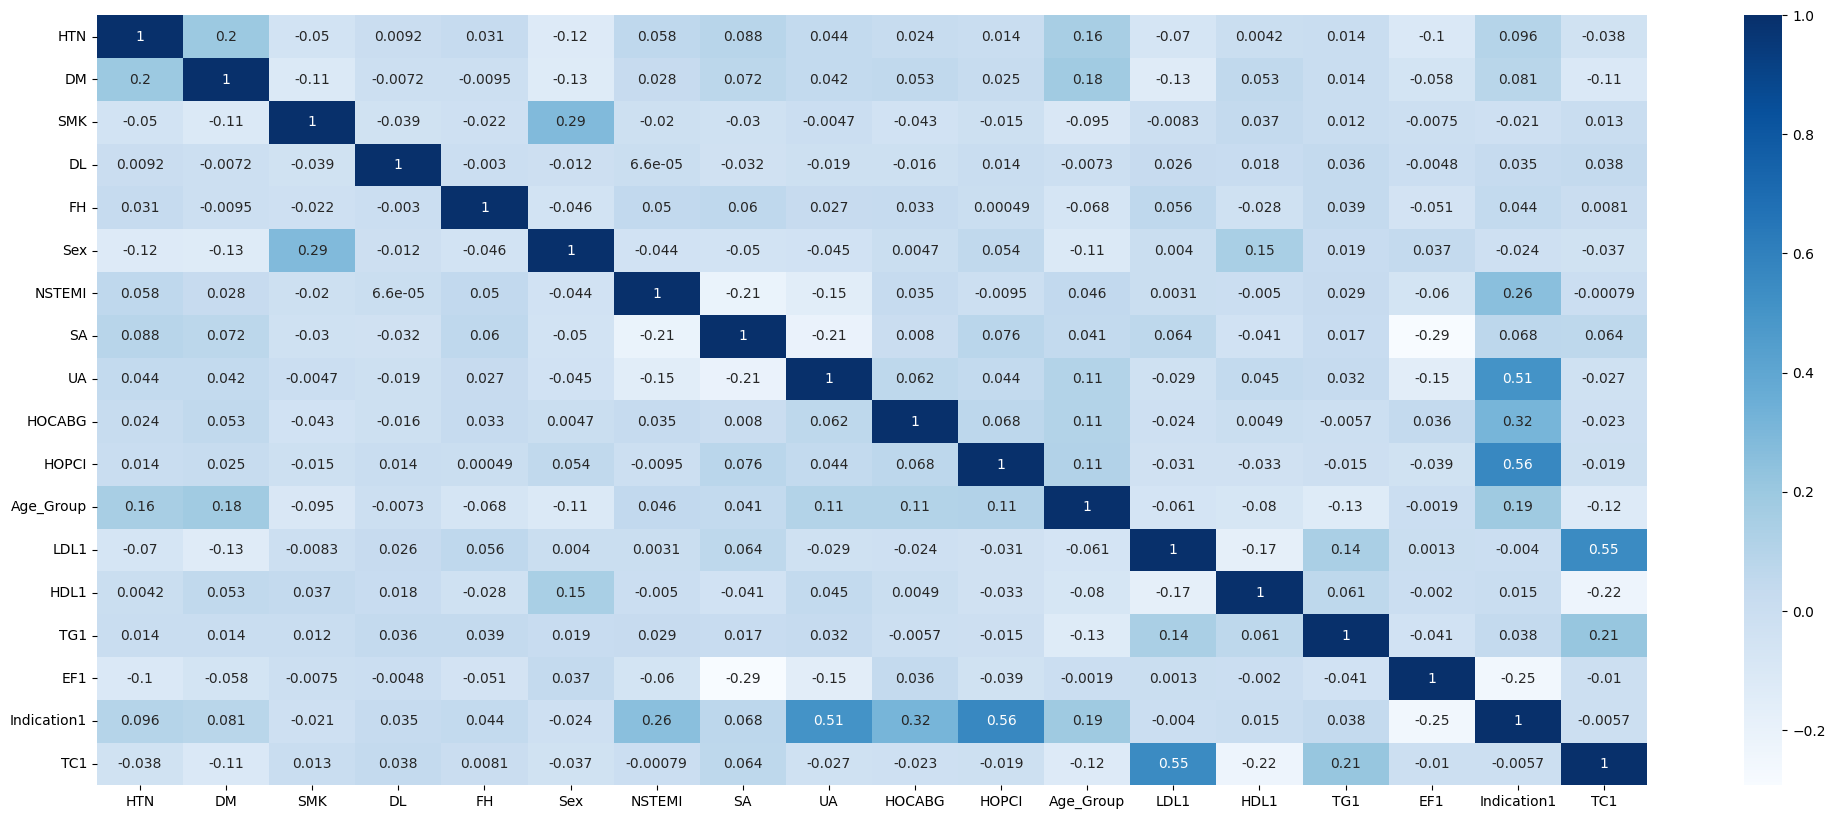

In [41]:
#Multicolinearity Test
plt.figure(figsize=(25,10))
sns.heatmap(X_Feature_Selection.corr(),cmap="Blues", annot=True)
sns.color_palette("Paired")

# Lasso

In [42]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=10,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X,Y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


In [43]:
names=df.drop("AMI", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['HTN' 'DM' 'SMK' 'DL' 'FH' 'Sex' 'NSTEMI' 'SA' 'UA' 'HOCABG' 'HOPCI'
 'Age_Group' 'LDL1' 'HDL1' 'TG1' 'EF1' 'Indication1' 'TC1']


In [44]:
# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params , cv=kf)
lasso_cv.fit(X_Feature_Selection,y_Feature_Selection)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': np.float64(1e-05)}


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   HTN          1690 non-null   int64
 1   DM           1690 non-null   int64
 2   SMK          1690 non-null   int64
 3   DL           1690 non-null   int64
 4   FH           1690 non-null   int64
 5   Sex          1690 non-null   int64
 6   NSTEMI       1690 non-null   int64
 7   SA           1690 non-null   int64
 8   UA           1690 non-null   int64
 9   HOCABG       1690 non-null   int64
 10  HOPCI        1690 non-null   int64
 11  Age_Group    1690 non-null   int64
 12  LDL1         1690 non-null   int64
 13  HDL1         1690 non-null   int64
 14  TG1          1690 non-null   int64
 15  EF1          1690 non-null   int64
 16  Indication1  1690 non-null   int64
 17  TC1          1690 non-null   int64
 18  AMI          1690 non-null   int64
dtypes: int64(19)
memory usage: 251.0 KB


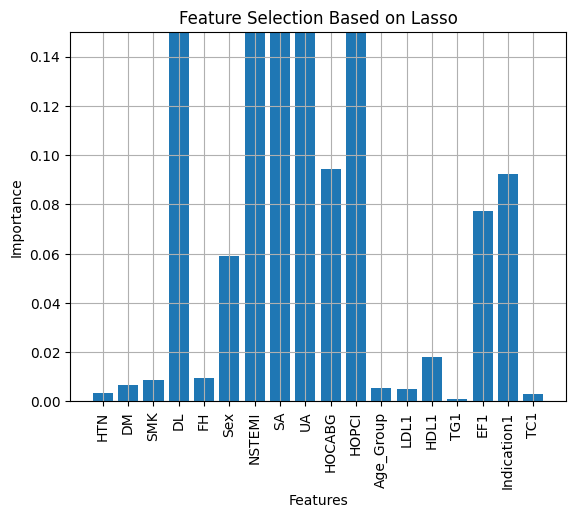

In [46]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train_Feature_Selection, y_train_Feature_Selection)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,0.15)
plt.show()

In [47]:
# Get selected and removed features
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
selected_features = [feature_names[i] for i in range(len(lasso1.coef_)) if lasso1.coef_[i] != 0]
removed_features = [feature_names[i] for i in range(len(lasso1.coef_)) if lasso1.coef_[i] == 0]
print("Selected Features:", selected_features)
print("Removed Features:", removed_features)

Selected Features: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18']
Removed Features: []


# Boruta Feature selection


In [49]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.2 MB/s eta 0:00:00


In [50]:
# Install Boruta if not already installed

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)

# Initialize Boruta with RandomForest as the estimator
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)

# Fit Boruta to the data
boruta.fit(X.values, Y.values)

# Check which features are important
print("Selected Features:")
print(X.columns[boruta.support_])

# Get the ranking of all features
#print("\nFeature Ranking:")
#for i, feature in enumerate(X.columns):
    #print(f"{feature}: {boruta.ranking_[i]}")


Selected Features:
Index(['HTN', 'DM', 'FH', 'Sex', 'NSTEMI', 'SA', 'UA', 'HOCABG', 'HOPCI',
       'Age_Group', 'EF1', 'Indication1', 'AMI'],
      dtype='object')


In [51]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier


# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)

# Apply Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(X.values, Y)

# Create DataFrame for results
feature_ranks = pd.DataFrame({
    "Feature": X.columns,
    "Importance Score": boruta_selector.ranking_,
    "Decision": ["Confirmed" if x == 1 else "Tentative" if x == 2 else "Rejected" for x in boruta_selector.ranking_]
})

# Sort by importance
feature_ranks = feature_ranks.sort_values(by="Importance Score", ascending=True)

# Display results
print(feature_ranks)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	19
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	14 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	15 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	5
Iteration: 	16 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	6



In [52]:
feature_ranks

,Feature,Importance Score,Decision
0,HTN,1,Confirmed
1,DM,1,Confirmed
5,Sex,1,Confirmed
4,FH,1,Confirmed
6,NSTEMI,1,Confirmed
7,SA,1,Confirmed
9,HOCABG,1,Confirmed
8,UA,1,Confirmed
15,EF1,1,Confirmed
11,Age_Group,1,Confirmed


# Accuracy Parameters

In [83]:
# Define the Features for different Categories
#target = "Age_at_first_marriage"
df_Chi =df.drop(columns=["TC1","DL","TG1","FH","LDL1","HDL1"])
df_Lasso = df
df_Boruta= df[['HTN', 'DM', 'Sex', 'NSTEMI', 'SA', 'UA', 'HOCABG', 'HOPCI',
       'Age_Group', 'EF1', 'Indication1', 'FH','AMI']]
#df_Boruta = df.drop(columns=["Husband_desire_for_children", "Ideal_number_of_children","Occupation_of_husband"])

print(df_Chi.shape)
print(df_Lasso.shape)
print(df_Boruta.shape)

(1690, 13)
(1690, 19)
(1690, 13)


In [84]:
X_Lasso =df_Lasso.drop("AMI",axis=1)
Y_Lasso =df_Lasso["AMI"]
X_chi =df_Chi.drop("AMI",axis=1)
Y_chi =df_Chi["AMI"]
X_Boruta =df_Boruta.drop("AMI",axis=1)
Y_Boruta =df_Boruta["AMI"]

In [88]:
print(X_chi.shape)
print(X_Lasso.shape)
print(X_Boruta.shape)

(1690, 12)
(1690, 18)
(1690, 12)


In [89]:
# Defining the Models
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
models = [tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=4, class_weight=None, min_samples_split = 2, min_samples_leaf=0.05, random_state=0),
          SVC(kernel ="rbf", probability=True, C=10, gamma= 0.1),
          BernoulliNB(alpha=10.0),
          KNeighborsClassifier(n_neighbors=3),
          RandomForestClassifier(criterion='gini',min_samples_leaf=200),
          GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100),
          XGBClassifier(learning_rate =0.02, max_depth =5, min_samples_leaf = 0.05),
          AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)]

# DT : alpha: 0.01, criterion: 'gini', max depth: 7,  max features: 'log2'


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize lists to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


# Set up cross-validation
cv = StratifiedKFold(n_splits=10)
def compare_models(X, Y, model):
    # Perform cross-validation loop
    for train_idx, test_idx in cv.split(X, Y):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = Y.values[train_idx], Y.values[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append scores
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)

In [91]:
Y_Lasso.value_counts()

,count
AMI,
0,845
1,845


# Lasso Features

In [92]:
accuracy_scores_main = []
precision_scores_main = []
recall_scores_main = []
f1_scores_main = []

for model in models:
    # Run the model comparison
    compare_models(X_Lasso, Y_Lasso, model)

    # Append the mean scores without reassigning
    accuracy_scores_main.append(np.mean(accuracy_scores) * 100)
    precision_scores_main.append(np.mean(precision_scores) * 100)
    recall_scores_main.append(np.mean(recall_scores) * 100)
    f1_scores_main.append(np.mean(f1_scores) * 100)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:21:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_lea

In [93]:
model_performance1 = pd.DataFrame(
    {'Model': ['CART','SVM','Naive Bayes','KNN','RM','GBM','ADABoost','XGBoost'],
    'Accuracy': accuracy_scores_main,
    'Precision': precision_scores_main,
    'Recall': recall_scores_main,
    'F1 Score': f1_scores_main
     }
)
model_performance1

,Model,Accuracy,Precision,Recall,F1 Score
0,CART,93.964497,94.517784,93.964497,93.940966
1,SVM,95.532544,95.835743,95.532544,95.520234
2,Naive Bayes,95.167653,95.558902,95.167653,95.152348
3,KNN,95.384615,95.697995,95.384615,95.372727
4,RM,95.136095,95.517582,95.136095,95.121292
5,GBM,95.374753,95.696093,95.374753,95.362316
6,ADABoost,95.486052,95.770372,95.486052,95.475158
7,XGBoost,95.310651,95.645956,95.310651,95.297568


# Chi-square Features

In [94]:
accuracy_scores_main = []
precision_scores_main = []
recall_scores_main = []
f1_scores_main = []

for model in models:
    # Run the model comparison
    compare_models(X_chi,Y_chi,model)

    # Append the mean scores without reassigning
    accuracy_scores_main.append(np.mean(accuracy_scores) * 100)
    precision_scores_main.append(np.mean(precision_scores) * 100)
    recall_scores_main.append(np.mean(recall_scores) * 100)
    f1_scores_main.append(np.mean(f1_scores) * 100)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_lea

In [95]:
model_performance2 = pd.DataFrame(
    {'Model': ['CART','SVM','Naive Bayes','KNN','RM','GBM','ADABoost','XGBoost'],
    'Accuracy': accuracy_scores_main,
    'Precision': precision_scores_main,
    'Recall': recall_scores_main,
    'F1 Score': f1_scores_main
     }
)
model_performance2

,Model,Accuracy,Precision,Recall,F1 Score
0,CART,95.161078,95.520604,95.161078,95.146835
1,SVM,95.337278,95.665238,95.337278,95.324350
2,Naive Bayes,95.266272,95.615150,95.266272,95.252697
3,KNN,95.315582,95.639101,95.315582,95.303026
4,RM,95.207101,95.557179,95.207101,95.193352
5,GBM,95.304311,95.631750,95.304311,95.291469
6,ADABoost,95.392505,95.702140,95.392505,95.380429
7,XGBoost,95.310651,95.644197,95.310651,95.297555


# Boruta Features

In [96]:
accuracy_scores_main = []
precision_scores_main = []
recall_scores_main = []
f1_scores_main = []

for model in models:
    # Run the model comparison
    compare_models(X_Boruta,Y_Boruta,model)

    # Append the mean scores without reassigning
    accuracy_scores_main.append(np.mean(accuracy_scores) * 100)
    precision_scores_main.append(np.mean(precision_scores) * 100)
    recall_scores_main.append(np.mean(recall_scores) * 100)
    f1_scores_main.append(np.mean(f1_scores) * 100)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_lea

In [97]:
model_performance3 = pd.DataFrame(
    {'Model': ['CART','SVM','Naive Bayes','KNN','RM','GBM','ADABoost','XGBoost'],
    'Accuracy': accuracy_scores_main,
    'Precision': precision_scores_main,
    'Recall': recall_scores_main,
    'F1 Score': f1_scores_main
     }
)
model_performance3

,Model,Accuracy,Precision,Recall,F1 Score
0,CART,95.231465,95.577937,95.231465,95.217755
1,SVM,95.335306,95.664291,95.335306,95.322314
2,Naive Bayes,95.291187,95.632804,95.291187,95.277791
3,KNN,95.331361,95.657558,95.331361,95.318585
4,RM,95.269090,95.611337,95.269090,95.255602
5,GBM,95.322754,95.650454,95.322754,95.309861
6,ADABoost,95.369179,95.685730,95.369179,95.356767
7,XGBoost,95.315582,95.647785,95.315582,95.302503


# Roc Curve

In [98]:
# Define the Features for different Categories
#target = "Age_at_first_marriage"
df_Chi =df.drop(columns=["TC1","DL","TG1","FH","LDL1","HDL1"])
df_Lasso = df
df_Boruta= df[['HTN', 'DM', 'Sex', 'NSTEMI', 'SA', 'UA', 'HOCABG', 'HOPCI',
       'Age_Group', 'EF1', 'Indication1', 'FH','AMI']]
#df_Boruta = df.drop(columns=["Husband_desire_for_children", "Ideal_number_of_children","Occupation_of_husband"])

print(df_Chi.shape)
print(df_Lasso.shape)
print(df_Boruta.shape)

(1690, 13)
(1690, 19)
(1690, 13)


In [65]:
X_Lasso =df_Lasso.drop("AMI",axis=1)
Y_Lasso =df_Lasso["AMI"]
X_chi =df_Chi.drop("AMI",axis=1)
Y_chi =df_Chi["AMI"]
X_Boruta =df_Boruta.drop("AMI",axis=1)
Y_Boruta =df_Boruta["AMI"]

In [100]:
print(X_chi.shape)
print(X_Lasso.shape)
print(X_Boruta.shape)

(1690, 12)
(1690, 18)
(1690, 12)


In [101]:
# Defining the Models
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

models = [tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=4, class_weight=None, min_samples_split = 2, min_samples_leaf=0.05, random_state=0),
          SVC(kernel ="rbf", probability=True, C=10, gamma= 0.1),
          BernoulliNB(alpha=10.0),
          KNeighborsClassifier(n_neighbors=3),
          RandomForestClassifier(criterion='gini',min_samples_leaf=200),
          GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100),
          XGBClassifier(learning_rate =0.02, max_depth =5, min_samples_leaf = 0.05),
          AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)]

Non_ensemble_models = [tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=4, class_weight=None, min_samples_split = 2, min_samples_leaf=0.05, random_state=0),
          SVC(kernel ="rbf", probability=True, C=10, gamma= 0.1),
          BernoulliNB(alpha=10.0),
          KNeighborsClassifier(n_neighbors=3)]

Ensemble_models=[RandomForestClassifier(criterion='gini',min_samples_leaf=200),
          GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100),
          XGBClassifier(learning_rate =0.02, max_depth =5, min_samples_leaf = 0.05),
          AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)]


In [102]:
#Defining Material for ROC curve :
linestyles = ['--', '--', '--', '--']  # Different linestyles for each model
colors = ['b', 'g', 'r', 'y']  # Different colors for each model
Non_Ensemble_models_name=[' k-nearest neighbors','Classification and Regression Trees','Support Vector Machine','Naive Bayes']
Ensemble_models_name= ['Random Forest','Gradient Boosting','XG Boost','ADA Boost']

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
model_scores1 =[]
fpr1= []
tpr1= []
thresholds1=[]
auc1= []
def AUC_exp(x_train, x_test, y_train, y_test,models):
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)

# Lasso Curve

**Non Ensemble Models**

In [134]:
X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso= train_test_split(X_Lasso, Y_Lasso, test_size=0.3, random_state=42)
for i in Non_ensemble_models:
    i.fit(X1_train_Lasso, y_train_Lasso)

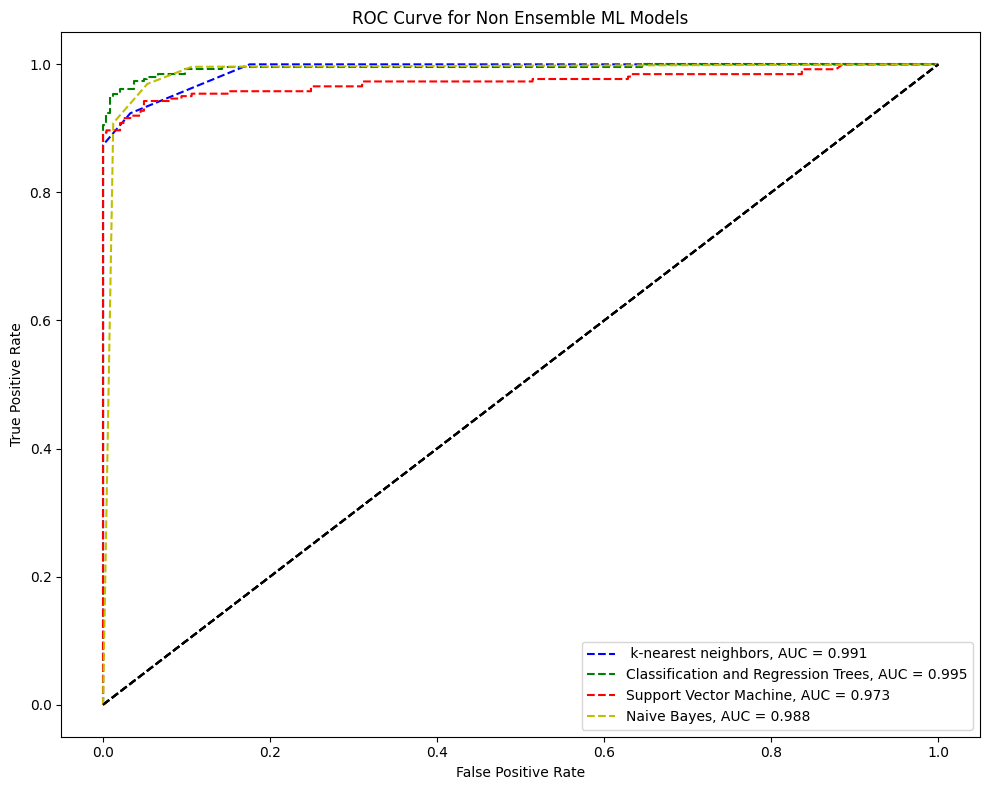

In [135]:
def AUC_exp(x_train, x_test, y_train, y_test,models):
    fpr1=[]
    tpr1=[]
    thresholds1=[]
    model_scores1=[]
    auc1=[]
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)
    #Return the calculated values
    return fpr1, tpr1, auc1 #Added return statement to return the calculated values from the function

#Call the Function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Store the returned values from the AUC_exp function
fpr1, tpr1, auc1 = AUC_exp(X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso,Non_ensemble_models)  # Assigned the returned values to variables

# Plot the Graph
import matplotlib.pyplot as plt # Import matplotlib.pyplot
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Non_Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Non Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Ensemble Models**

In [136]:
X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso= train_test_split(X_Lasso, Y_Lasso, test_size=0.3, random_state=42)
for i in Ensemble_models:
    i.fit(X1_train_Lasso, y_train_Lasso)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


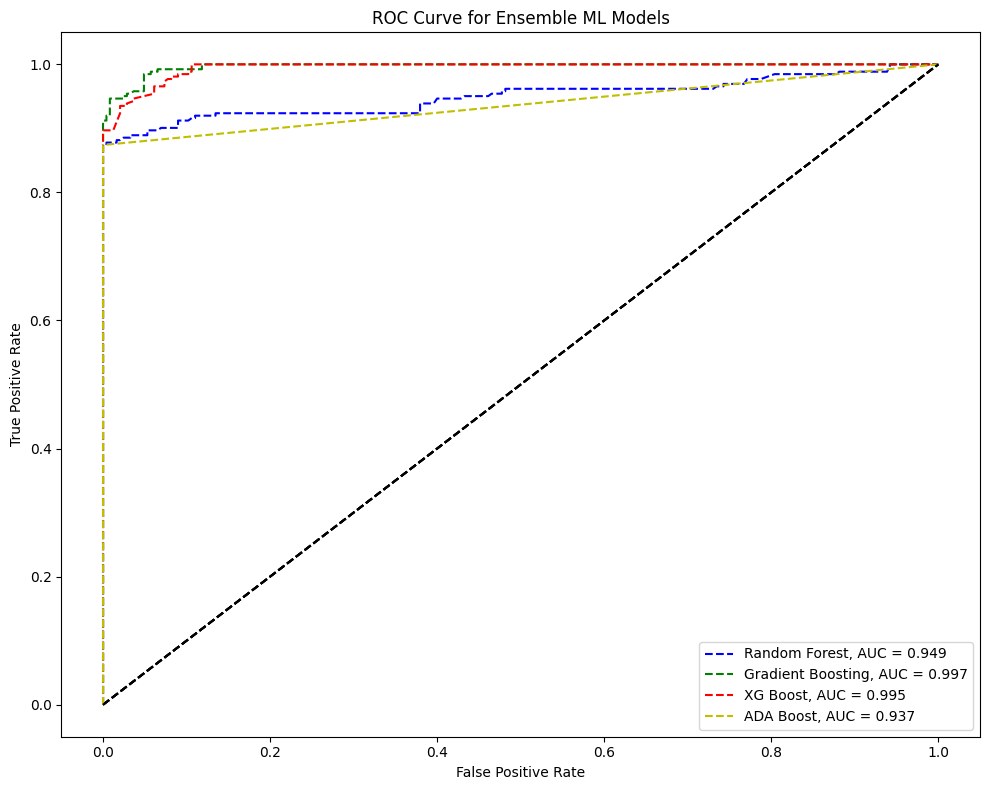

In [137]:
def AUC_exp(x_train, x_test, y_train, y_test,models):
    fpr1=[]
    tpr1=[]
    thresholds1=[]
    model_scores1=[]
    auc1=[]
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)
    #Return the calculated values
    return fpr1, tpr1, auc1 #Added return statement to return the calculated values from the function

#Call the Function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Store the returned values from the AUC_exp function
fpr1, tpr1, auc1 = AUC_exp(X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso,Ensemble_models)  # Assigned the returned values to variables

# Plot the Graph
import matplotlib.pyplot as plt # Import matplotlib.pyplot
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Chi-square Curve

**Ensemble Models**

In [138]:
X1_train_chi, X1_test_chi, y_train_chi, y_test_chi= train_test_split(X_chi, Y_chi, test_size=0.3, random_state=42)
for i in Ensemble_models:
    i.fit(X1_train_chi,y_train_chi)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


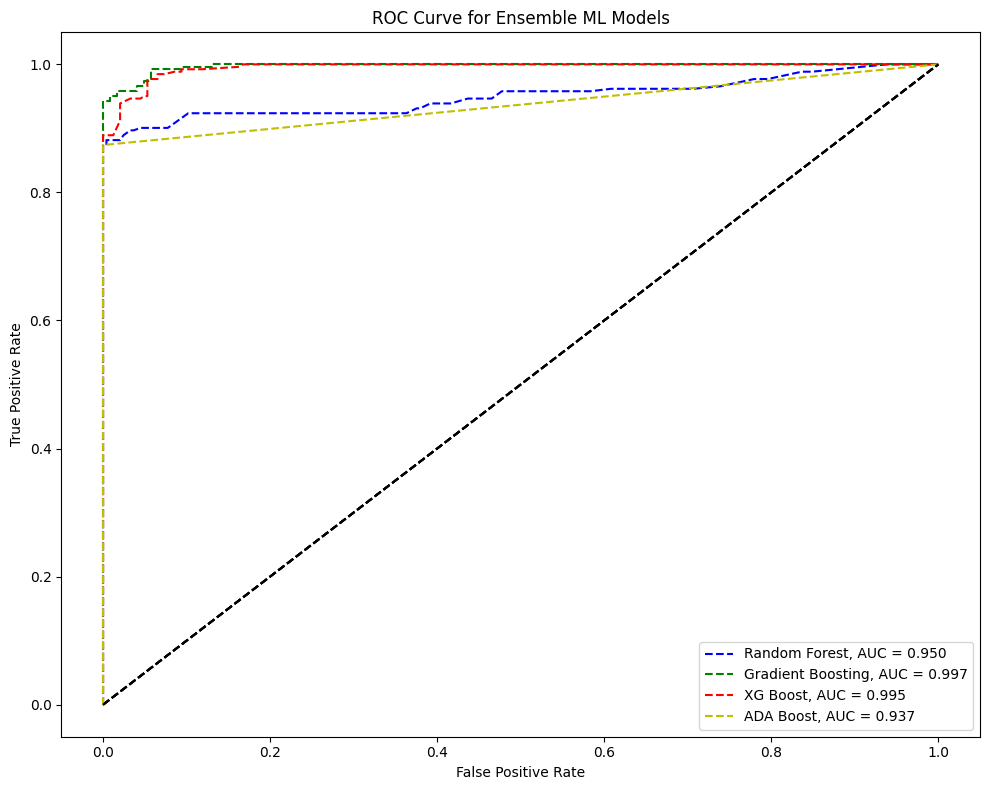

In [139]:
def AUC_exp(x_train, x_test, y_train, y_test,models):
    fpr1=[]
    tpr1=[]
    thresholds1=[]
    model_scores1=[]
    auc1=[]
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)
    #Return the calculated values
    return fpr1, tpr1, auc1 #Added return statement to return the calculated values from the function

#Call the Function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Store the returned values from the AUC_exp function
fpr1, tpr1, auc1 = AUC_exp(X1_train_chi, X1_test_chi, y_train_chi, y_test_chi,Ensemble_models)  # Assigned the returned values to variables

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non ensemble Models**

In [140]:
X1_train_chi, X1_test_chi, y_train_chi, y_test_chi= train_test_split(X_chi, Y_chi, test_size=0.3, random_state=42)
for i in Non_ensemble_models:
    i.fit(X1_train_chi,y_train_chi)

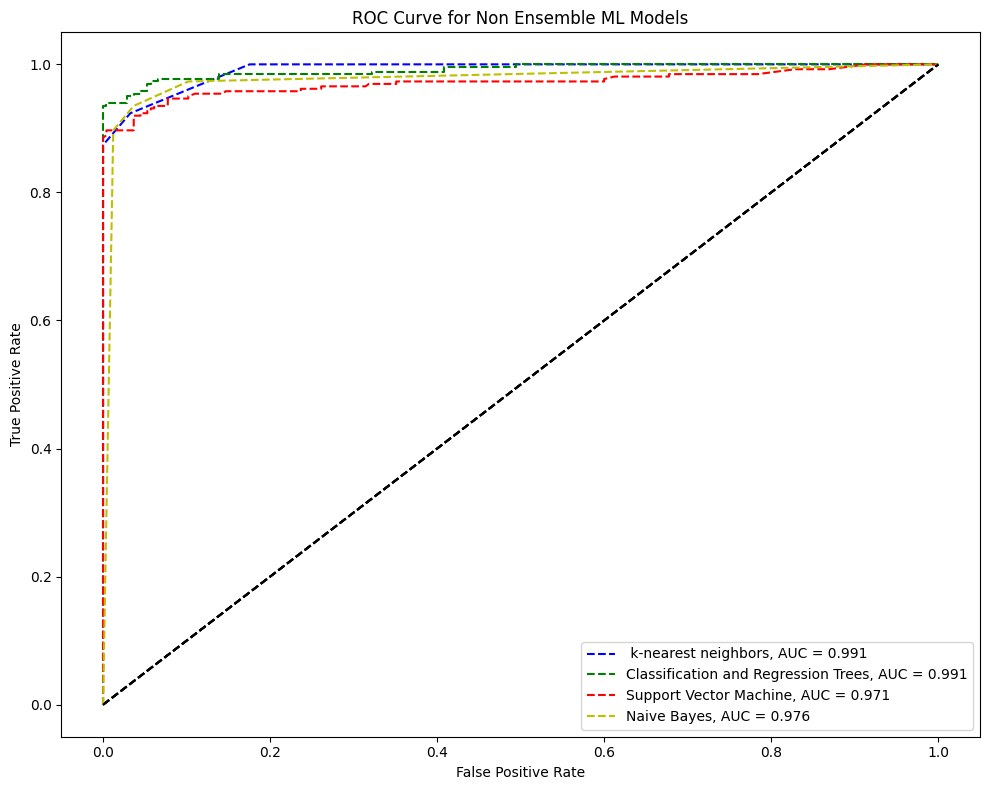

In [141]:
def AUC_exp(x_train, x_test, y_train, y_test,models):
    fpr1=[]
    tpr1=[]
    thresholds1=[]
    model_scores1=[]
    auc1=[]
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)
    #Return the calculated values
    return fpr1, tpr1, auc1 #Added return statement to return the calculated values from the function

#Call the Function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Store the returned values from the AUC_exp function
fpr1, tpr1, auc1 = AUC_exp(X1_train_chi, X1_test_chi, y_train_chi, y_test_chi,Non_ensemble_models)  # Assigned the returned values to variables

#Call the Function

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Non_Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Non Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Boruta Curve

**Ensemble Models**

In [142]:
X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test= train_test_split(X_Boruta, Y_Boruta, test_size=0.3, random_state=42)
for i in Ensemble_models:
    i.fit(X1_Boruta_train, y_Boruta_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:53:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


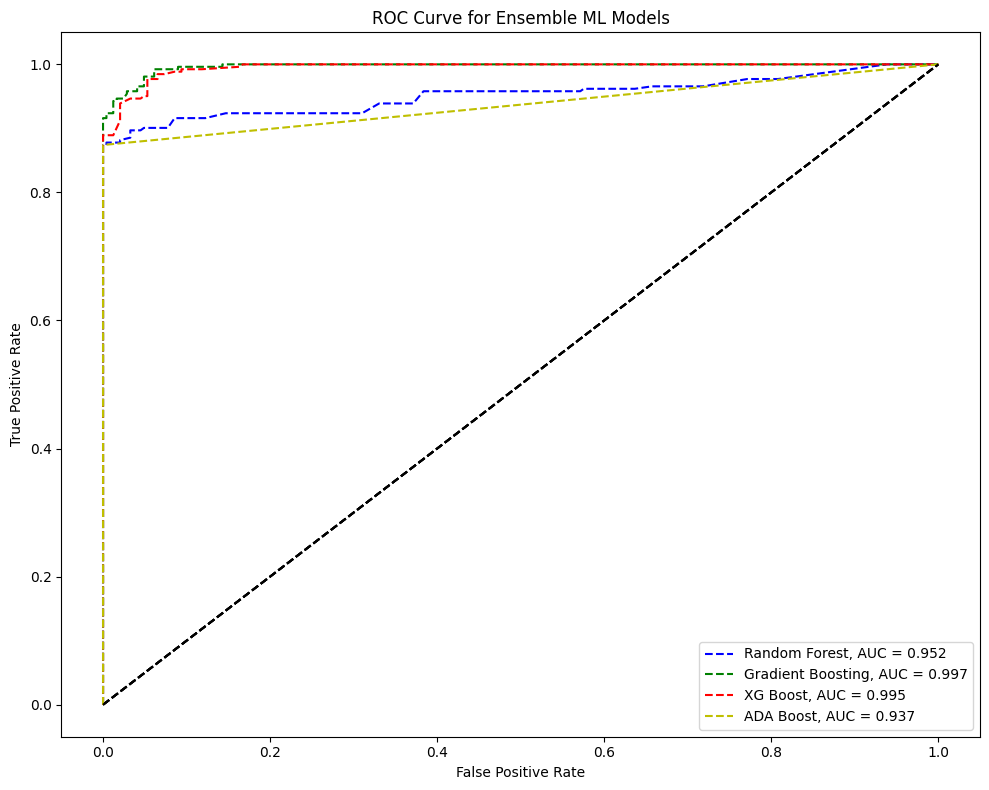

In [143]:
def AUC_exp(x_train, x_test, y_train, y_test,models):
    fpr1=[]
    tpr1=[]
    thresholds1=[]
    model_scores1=[]
    auc1=[]
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)
    #Return the calculated values
    return fpr1, tpr1, auc1 #Added return statement to return the calculated values from the function

#Call the Function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Store the returned values from the AUC_exp function
fpr1, tpr1, auc1 = AUC_exp(X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test,Ensemble_models)  # Assigned the returned values to variables

#Call the Function

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non Ensemble Models**

**Non ensemble Models**

In [144]:
X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test= train_test_split(X_Boruta, Y_Boruta, test_size=0.3, random_state=42)
for i in Non_ensemble_models:
    i.fit(X1_Boruta_train, y_Boruta_train)

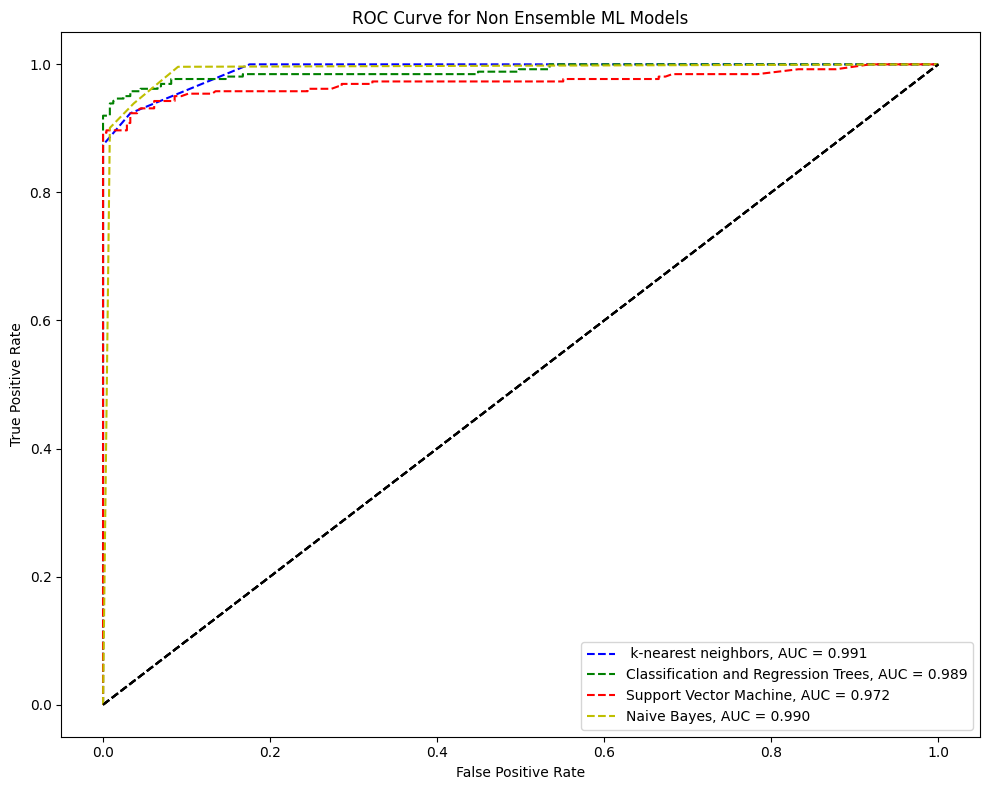

In [145]:
def AUC_exp(x_train, x_test, y_train, y_test,models):
    fpr1=[]
    tpr1=[]
    thresholds1=[]
    model_scores1=[]
    auc1=[]
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)
    #Return the calculated values
    return fpr1, tpr1, auc1 #Added return statement to return the calculated values from the function

#Call the Function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Store the returned values from the AUC_exp function
fpr1, tpr1, auc1 = AUC_exp(X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test,Non_ensemble_models)  # Assigned the returned values to variables

#Call the Function

# Plot the Graph
# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Non_Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Non Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()